In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import boxplot

In [373]:
df=pd.read_csv("bank-full.csv", delimiter=";")

In [374]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [375]:
for col in df.columns:
    print(col, df[col].unique())

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
balance [ 2143    29     2 ...  8205 14204 16353]
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration [ 261  151   76 ... 1298 1246 1556]
campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27

In [376]:
df["job"].replace({"admin.": "admin"}, inplace=True)


C:\Users\binar\AppData\Local\Temp\ipykernel_16500\1340768125.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["job"].replace({"admin.": "admin"}, inplace=True)


In [377]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [378]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [379]:
for data in df.duplicated():
  if data==True:
    print(data)
    df.drop_duplicates(inplace=True)

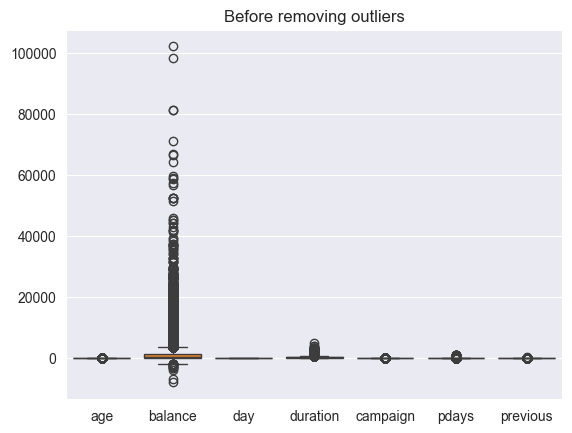

In [380]:
sns.boxplot(df)
plt.title("Before removing outliers")
plt.show()

Transferting categorical variables using one hot encoding and label encoding

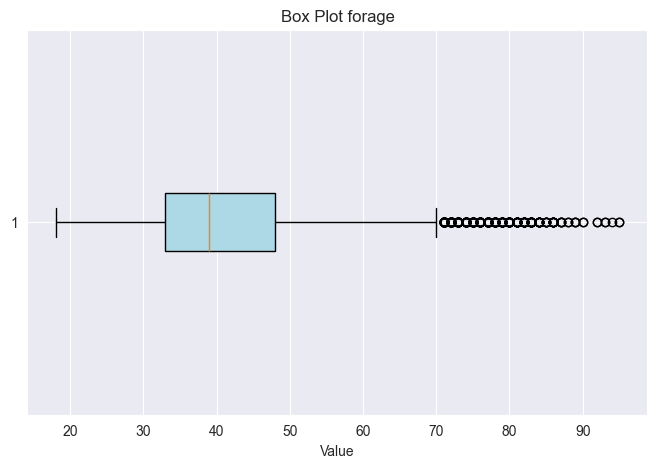

Skipping boxplot for column 'job' as it is not numeric.
Skipping boxplot for column 'marital' as it is not numeric.
Skipping boxplot for column 'education' as it is not numeric.
Skipping boxplot for column 'default' as it is not numeric.


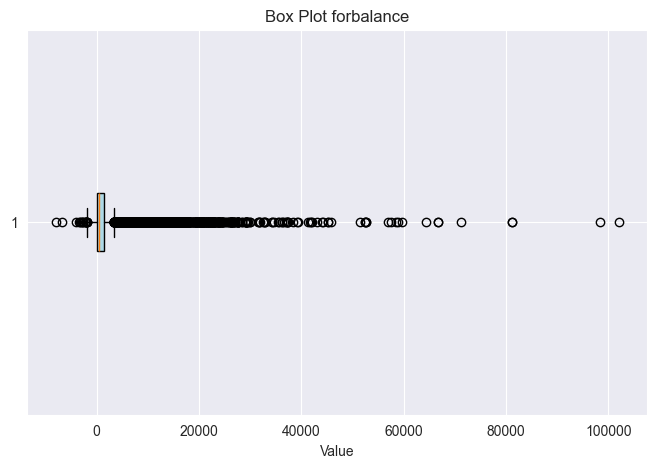

Skipping boxplot for column 'housing' as it is not numeric.
Skipping boxplot for column 'loan' as it is not numeric.
Skipping boxplot for column 'contact' as it is not numeric.


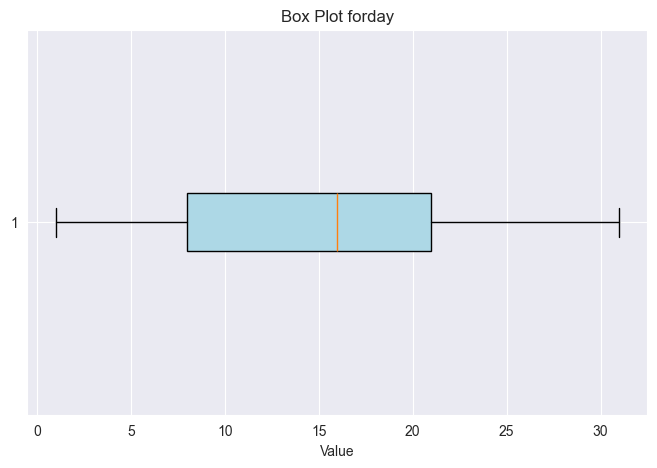

Skipping boxplot for column 'month' as it is not numeric.


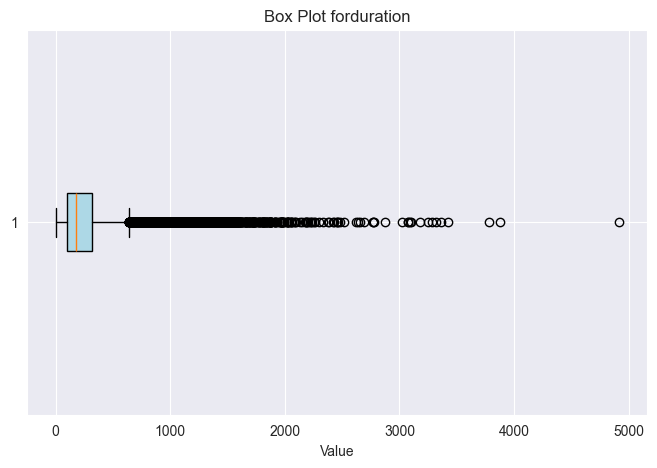

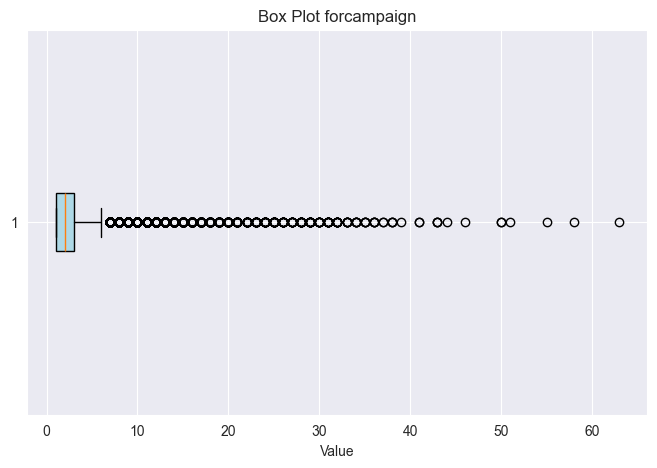

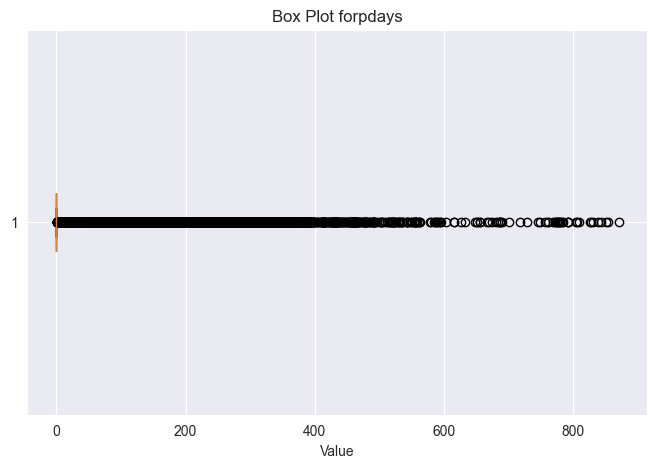

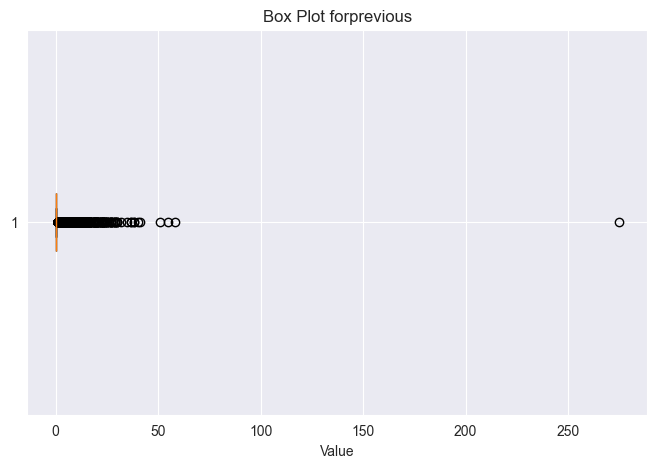

Skipping boxplot for column 'poutcome' as it is not numeric.
Skipping boxplot for column 'y' as it is not numeric.


In [381]:
# Loop through columns, but exclude the 'Date' column (or other non-numeric columns)
for col in df.columns:
    if df[col].dtype in [int, float]:  # Check if the column's data type is numeric
        plt.figure(figsize=(8, 5))
        plt.boxplot(df[col], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
        plt.title("Box Plot for"+ col)
        plt.xlabel("Value")
        plt.show() # Add plt.show() to display each boxplot individually
    else:
        print(f"Skipping boxplot for column '{col}' as it is not numeric.")

In [382]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

print("Original Data Size:", len(df))
print("Data Size after Outlier Removal:", len(df_no_outliers))


Original Data Size: 45211
Data Size after Outlier Removal: 44724


In [383]:
Q1=df['balance'].quantile(0.25)
Q3=df['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers_balance=df_no_outliers[(df_no_outliers['balance'] >= lower_bound) & (df_no_outliers['balance'] <= upper_bound)]



In [384]:
Q1=df['campaign'].quantile(0.25)
Q3=df['campaign'].quantile(0.75)

IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR

df_no_outliers_campaign=df_no_outliers_balance[(df_no_outliers_balance['balance'] >= lower_bound) & (df_no_outliers_balance['balance'] <= upper_bound)]


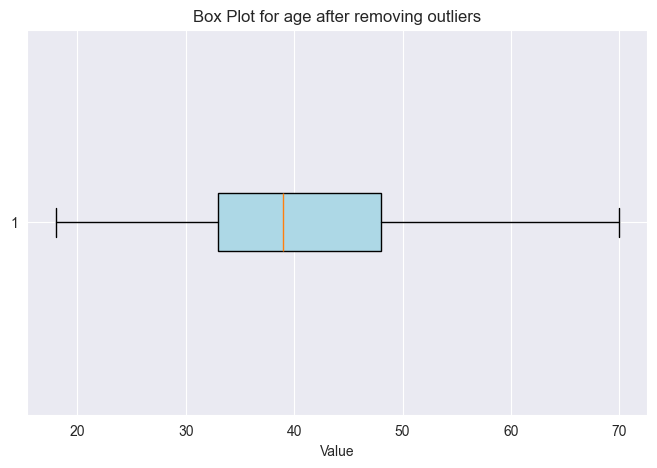

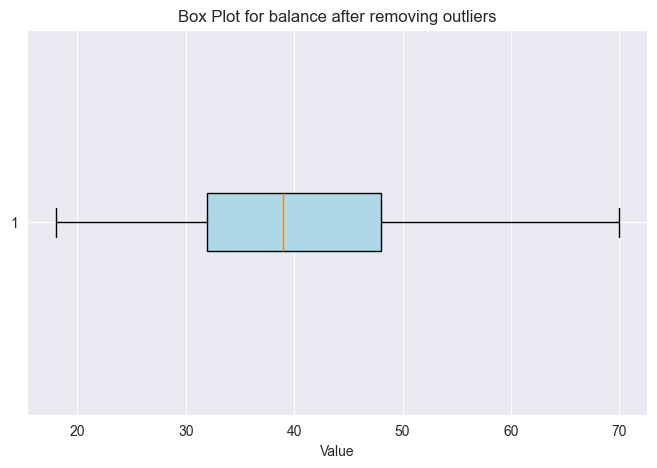

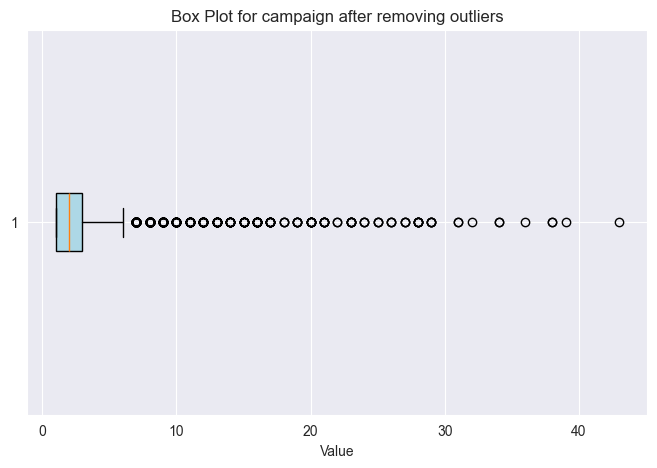

In [385]:
plt.figure(figsize=(8, 5))
plt.boxplot(df_no_outliers['age'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot for age after removing outliers")
plt.xlabel("Value")
plt.show()
plt.figure(figsize=(8, 5))
plt.boxplot(df_no_outliers_balance['age'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot for balance after removing outliers")
plt.xlabel("Value")
plt.show()
plt.figure(figsize=(8, 5))
plt.boxplot(df_no_outliers_campaign['campaign'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot for campaign after removing outliers")
plt.xlabel("Value")
plt.show()

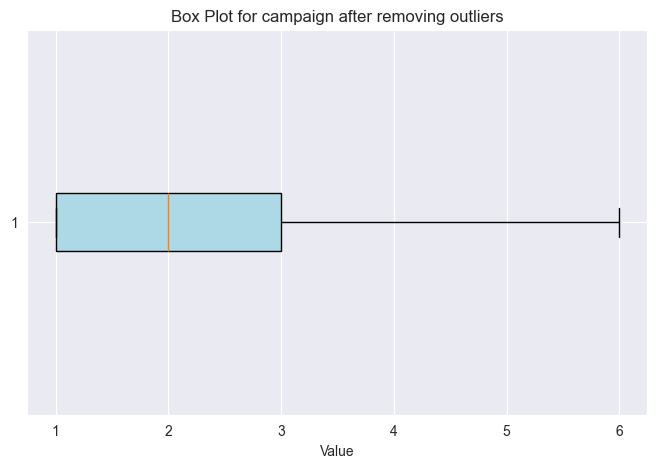

In [386]:
Q1=df_no_outliers_campaign['campaign'].quantile(0.25)
Q3=df_no_outliers_campaign['campaign'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

full_df=df_no_outliers_campaign[(df_no_outliers_campaign['campaign']>=lower_bound) & (df_no_outliers_campaign['campaign']<=upper_bound)]

plt.figure(figsize=(8, 5))
plt.boxplot(full_df["campaign"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot for campaign after removing outliers")
plt.xlabel("Value")
plt.show()

In [411]:
full_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [412]:
full_df.to_csv("full.csv")

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [388]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3992 entries, 2 to 45160
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        3992 non-null   int64 
 1   job        3992 non-null   object
 2   marital    3992 non-null   object
 3   education  3992 non-null   object
 4   default    3992 non-null   object
 5   balance    3992 non-null   int64 
 6   housing    3992 non-null   object
 7   loan       3992 non-null   object
 8   contact    3992 non-null   object
 9   day        3992 non-null   int64 
 10  month      3992 non-null   object
 11  duration   3992 non-null   int64 
 12  campaign   3992 non-null   int64 
 13  pdays      3992 non-null   int64 
 14  previous   3992 non-null   int64 
 15  poutcome   3992 non-null   object
 16  y          3992 non-null   object
dtypes: int64(7), object(10)
memory usage: 561.4+ KB


In [389]:
df=full_df

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3992 entries, 2 to 45160
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        3992 non-null   int64 
 1   job        3992 non-null   object
 2   marital    3992 non-null   object
 3   education  3992 non-null   object
 4   default    3992 non-null   object
 5   balance    3992 non-null   int64 
 6   housing    3992 non-null   object
 7   loan       3992 non-null   object
 8   contact    3992 non-null   object
 9   day        3992 non-null   int64 
 10  month      3992 non-null   object
 11  duration   3992 non-null   int64 
 12  campaign   3992 non-null   int64 
 13  pdays      3992 non-null   int64 
 14  previous   3992 non-null   int64 
 15  poutcome   3992 non-null   object
 16  y          3992 non-null   object
dtypes: int64(7), object(10)
memory usage: 561.4+ KB


In [391]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3992 entries, 2 to 45160
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        3992 non-null   int64 
 1   job        3992 non-null   object
 2   marital    3992 non-null   object
 3   education  3992 non-null   object
 4   default    3992 non-null   object
 5   balance    3992 non-null   int64 
 6   housing    3992 non-null   object
 7   loan       3992 non-null   object
 8   contact    3992 non-null   object
 9   day        3992 non-null   int64 
 10  month      3992 non-null   object
 11  duration   3992 non-null   int64 
 12  campaign   3992 non-null   int64 
 13  pdays      3992 non-null   int64 
 14  previous   3992 non-null   int64 
 15  poutcome   3992 non-null   object
 16  y          3992 non-null   object
dtypes: int64(7), object(10)
memory usage: 561.4+ KB


In [392]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [393]:
df.to_csv("Delimeted_Dataset.csv")

In [394]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [395]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


label_encoder = LabelEncoder()

month_mapping = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
    "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
}

df['month'] = df['month'].str.lower().map(month_mapping)

df['education'] = label_encoder.fit_transform(df['education'])



df['y'] = df['y'].map({'yes': 1, 'no': 0})


nominal_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
df = pd.get_dummies(df, columns=nominal_features)
df=df.astype(int)
df.head()

C:\Users\binar\AppData\Local\Temp\ipykernel_16500\314641100.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['month'].str.lower().map(month_mapping)
C:\Users\binar\AppData\Local\Temp\ipykernel_16500\314641100.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'] = label_encoder.fit_transform(df['education'])
C:\Users\binar\AppData\Local\Temp\ipykernel_16500\314641100.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,age,education,balance,day,month,duration,campaign,pdays,previous,y,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
2,33,1,2,5,5,76,1,-1,0,0,...,1,0,1,0,0,1,0,0,0,1
4,33,3,1,5,5,198,1,-1,0,0,...,0,1,0,0,0,1,0,0,0,1
7,42,2,2,5,5,380,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
12,53,1,6,5,5,517,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
19,33,1,0,5,5,54,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1


In [396]:
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
2,33,1,2,5,5,76,1,-1,0,0,...,1,0,1,0,0,1,0,0,0,1
4,33,3,1,5,5,198,1,-1,0,0,...,0,1,0,0,0,1,0,0,0,1
7,42,2,2,5,5,380,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
12,53,1,6,5,5,517,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
19,33,1,0,5,5,54,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1


In [397]:
df["month"].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

In [398]:
Pearson_Correlation = df.corr(method='pearson')


for col in Pearson_Correlation.columns:
    for index in Pearson_Correlation.index:
        if Pearson_Correlation.loc[index, col] > 0.9 and index != col:
            print(f"{index} and {col}: {Pearson_Correlation.loc[index, col]}")


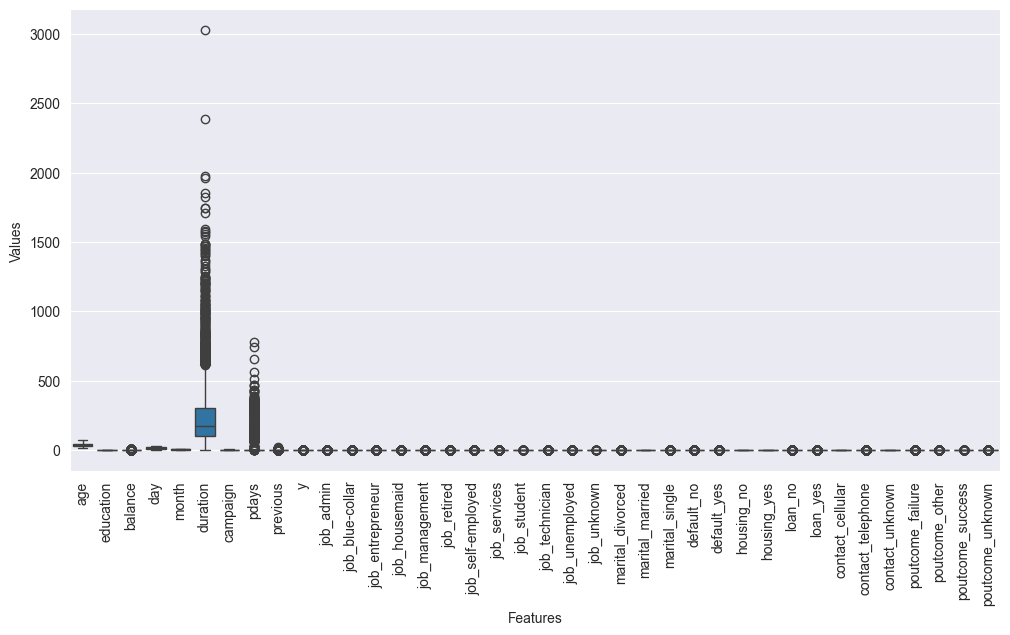

In [399]:
df_melted = df.melt(var_name="Features", value_name="Values")


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x="Features", y="Values")
plt.xticks(rotation=90)
plt.show()

In [400]:
df.drop('duration', axis=1, inplace=True)

In [401]:
df.head()

,age,education,balance,day,month,campaign,pdays,previous,y,job_admin,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
2,33,1,2,5,5,1,-1,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,33,3,1,5,5,1,-1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
7,42,2,2,5,5,1,-1,0,0,0,...,1,1,0,0,0,1,0,0,0,1
12,53,1,6,5,5,1,-1,0,0,0,...,1,1,0,0,0,1,0,0,0,1
19,33,1,0,5,5,1,-1,0,0,0,...,1,1,0,0,0,1,0,0,0,1


              Feature  Importance
0                 age    0.174172
3                 day    0.157400
4               month    0.094347
5            campaign    0.065126
6               pdays    0.047927
1           education    0.045852
2             balance    0.043965
34   poutcome_success    0.040248
7            previous    0.029177
12     job_management    0.021415
17     job_technician    0.020634
26        housing_yes    0.019902
21    marital_married    0.018947
25         housing_no    0.017910
22     marital_single    0.017134
8           job_admin    0.014482
20   marital_divorced    0.014185
9     job_blue-collar    0.014174
27            loan_no    0.013985
28           loan_yes    0.012935
15       job_services    0.011245
29   contact_cellular    0.011208
32   poutcome_failure    0.010749
13        job_retired    0.008606
35   poutcome_unknown    0.008317
14  job_self-employed    0.008218
31    contact_unknown    0.008109
10   job_entrepreneur    0.007491
18     job_une

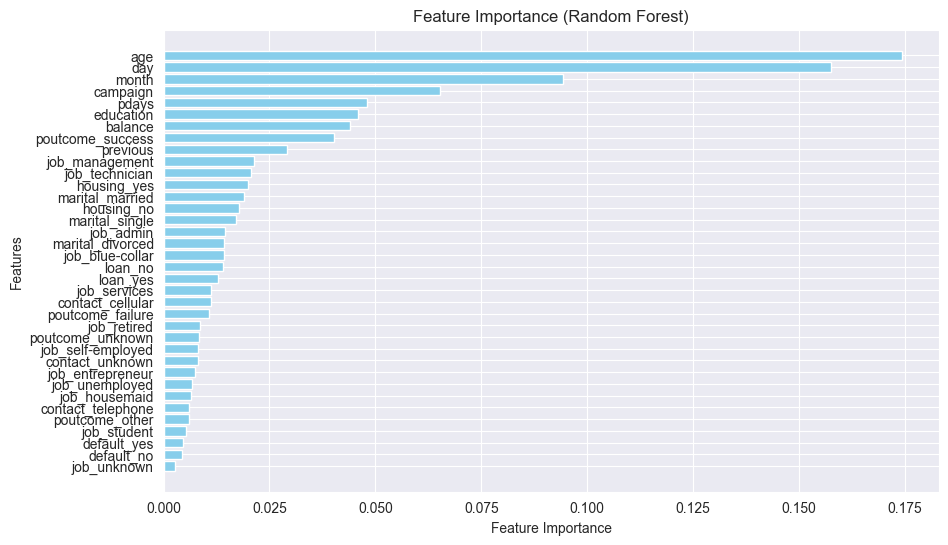

In [402]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

x_train=df.drop(columns=['y'])
y_train=df['y']

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Map feature importances to feature names
features = x_train.columns  # Feature names from your dataset
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


In [403]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['age','balance']
scaler = MinMaxScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])


df.head()

,age,education,balance,day,month,campaign,pdays,previous,y,job_admin,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
2,0.288462,1,0.500,5,5,1,-1,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,0.288462,3,0.375,5,5,1,-1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
7,0.461538,2,0.500,5,5,1,-1,0,0,0,...,1,1,0,0,0,1,0,0,0,1
12,0.673077,1,1.000,5,5,1,-1,0,0,0,...,1,1,0,0,0,1,0,0,0,1
19,0.288462,1,0.250,5,5,1,-1,0,0,0,...,1,1,0,0,0,1,0,0,0,1


In [404]:
from sklearn.decomposition import PCA
grouped_features=['marital_married', 'contact_cellular', 'job_admin', 'contact_unknown', 'job_blue-collar', 'marital_single', 'poutcome_failure', 'poutcome_unknown', 'marital_divorced', 'job_services', 'loan_no', 'loan_yes', 'job_retired', 'contact_telephone', 'job_student', 'job_unemployed', 'job_self-employed', 'poutcome_other', 'job_entrepreneur', 'job_housemaid', 'default_yes', 'default_no', 'job_unknown']


X=df[grouped_features]


pca = PCA(0.95)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:",explained_variance)
pca_columns = X_pca[:, :3]
pca_data = np.concatenate([pca_columns], axis=1)
pca_df = pd.DataFrame(pca_data, columns=['PCA1','PCA2','PCA3'])
pca_df.head()
new_df=pd.concat([df.iloc[:,0:10], pca_df],axis=1)
new_df.head()



Explained Variance Ratio: [0.19079266 0.17576567 0.13399226 0.07876761 0.07625105 0.07263235
 0.04785591 0.04039032 0.0352435  0.03249839 0.02076051 0.01959331
 0.01843525 0.0173251 ]


,age,education,balance,day,month,campaign,pdays,previous,y,job_admin,PCA1,PCA2,PCA3
2,0.288462,1.0,0.500,5.0,5.0,1.0,-1.0,0.0,0.0,0.0,-0.831958,-0.797609,-0.057929
4,0.288462,3.0,0.375,5.0,5.0,1.0,-1.0,0.0,0.0,0.0,-1.059166,0.121237,0.239543
7,0.461538,2.0,0.500,5.0,5.0,1.0,-1.0,0.0,0.0,0.0,-0.663764,-1.203682,0.054064
12,0.673077,1.0,1.000,5.0,5.0,1.0,-1.0,0.0,0.0,0.0,-1.027276,0.104204,0.206524
19,0.288462,1.0,0.250,5.0,5.0,1.0,-1.0,0.0,0.0,0.0,-1.188498,0.168839,0.279011


In [407]:
new_df.to_csv('new_DF12.csv')

In [410]:
new_df.isnull().sum()

age          3674
education    3674
balance      3674
day          3674
month        3674
campaign     3674
pdays        3674
previous     3674
y            3674
job_admin    3674
PCA1         3674
PCA2         3674
PCA3         3674
dtype: int64

In [409]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Splitting the dataset into features and target
X = new_df.drop(["y"], axis=1)
Y = new_df["y"]

from collections import Counter
from imblearn.combine import SMOTETomek

# Apply SMOTETomek (combines SMOTE and Tomek Links for balancing)
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, Y)

# Display the new class distribution
print("Class distribution after SMOTETomek:", Counter(y_resampled))


# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



# Training the Random Forest Classifier on the resampled data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)

# Evaluating the model on the training set
y_train_pred = rf.predict(X_resampled)
training_accuracy = accuracy_score(y_resampled, y_train_pred)
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")


y_val_pred = rf.predict(X_test)
validation_accuracy = accuracy_score(Y_test, y_val_pred)
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")

# Printing the classification report
print(classification_report(Y_test, y_val_pred))


C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py:392: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y contains NaN.

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTETomek
from collections import Counter

# Splitting the dataset into features and target
X = new_df.drop(["y"], axis=1)
Y = new_df["y"]

# Splitting the dataset into training and testing sets (80-20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply SMOTETomek only on the training set (not on the whole dataset)
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, Y_train)

# Display the new class distribution after resampling
print("Class distribution after SMOTETomek:", Counter(y_resampled))

# Training the Random Forest Classifier on the resampled data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)

# Evaluating the model on the training set (resampled data)
y_train_pred = rf.predict(X_resampled)
training_accuracy = accuracy_score(y_resampled, y_train_pred)
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")

# Evaluating the model on the test set (original test data, no resampling)
y_val_pred = rf.predict(X_test)
validation_accuracy = accuracy_score(Y_test, y_val_pred)
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")

# Printing the classification report
print(classification_report(Y_test, y_val_pred))


Class distribution after SMOTETomek: Counter({0: 31620, 1: 31620})
Training Accuracy: 100.00%
Validation Accuracy: 88.79%
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      7952
           1       0.53      0.65      0.58      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.78      0.76      9043
weighted avg       0.90      0.89      0.89      9043



In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
scores = cross_val_score(rf_classifier, X, Y, cv=5, scoring='f1_macro')
print("Cross-Validation F1-Scores:", scores)
print("Mean F1-Score:", scores.mean())

Cross-Validation F1-Scores: [0.47781543 0.44230806 0.4491825  0.37133212 0.35670178]
Mean F1-Score: 0.4194679760631588


1, trainng Loss: 0.3761, val Loss: 0.3386
2, trainng Loss: 0.3295, val Loss: 0.3213
3, trainng Loss: 0.3101, val Loss: 0.2961
4, trainng Loss: 0.2955, val Loss: 0.2841
5, trainng Loss: 0.2853, val Loss: 0.2804
6, trainng Loss: 0.2791, val Loss: 0.2757
7, trainng Loss: 0.2753, val Loss: 0.2683
8, trainng Loss: 0.2721, val Loss: 0.2748
9, trainng Loss: 0.2708, val Loss: 0.2638
10, trainng Loss: 0.2682, val Loss: 0.2712


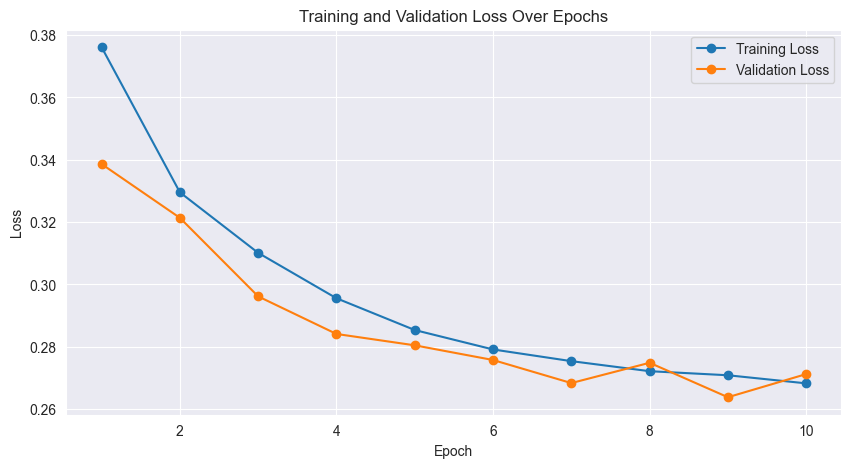

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11977
           1       0.57      0.19      0.29      1587

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.61     13564
weighted avg       0.86      0.89      0.86     13564



In [137]:
import torch
from torch.utils.data import DataLoader, random_split, TensorDataset
import torch.nn as nn
import torch.optim as optim


input = torch.tensor(new_df.drop(columns=['y']).values, dtype=torch.float32)
target = torch.tensor(new_df['y'].values, dtype=torch.long)


dataset = TensorDataset(input, target)
train_dataset, val_dataset = random_split(dataset, [int(0.7 * len(df)), len(df) - int(0.7 * len(df))])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

input_size = input.shape[1]


model = nn.Sequential(
    nn.Linear(input_size, 32),
    nn.ReLU(),
    nn.Linear(32, 2)
)


loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    training_losses.append(train_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = loss_function(outputs, targets)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    validation_losses.append(val_loss)

    print(f"{epoch + 1}, trainng Loss: {train_loss:.4f}, val Loss: {val_loss:.4f}")


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), training_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs + 1), validation_losses, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

y_pred = []
y_val = []
model.eval()
with torch.no_grad():
    for inputs, targets in val_loader:
        outputs = model(inputs)
        y_pred.append(torch.argmax(outputs, dim=1))
        y_val.append(targets)

y_pred = torch.cat(y_pred)
y_val = torch.cat(y_val)

print(classification_report(y_val.numpy(), y_pred.numpy()))
